# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


Резюме:

1) Целевая аудитория Банка - мужчины и женщины от 31-65 лет преимущественно в городах федерального назначения и городах до 100 тысяч человек
2) Крупнейшая группа клиентов взаимодействует с банком более 5 лет (38% выборки). Далее группа от 1 до 3 лет (22%). Новых клиентов до 1 года включительно приблизительно 20%. В промежутке между 3 и 5 годами произошёл отток клиентов.
3) NBI - доход Банка от клиента - не зависит от среднего размера транзакций. 
4) Основной продукт, генерирующий ценность - потребительские кредиты. При этом потребительские кредиты новым клиентам (до 6 м.) разрушают ценность.
5) Вклады генерируют ценность меньше, чем кредиты.
6) Оборот на счёте клиента имеет значение в терминах дохода Банка только для групп клиентов больше 5 лет и от 1 до 3 лет.

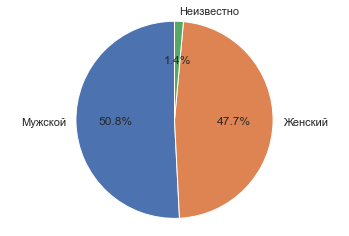

In [158]:
### Демографические показатели:
## Распределение по полу
# Клиентов обоих полов примерно равное количество, мужчин на 3% больше
# Всего клиентов -- 50 000 человек

labels = ['Мужской','Женский','Неизвестно']
sizes = [(len(df[df['gender']=='М']))/len(df)*100,
(len(df[df['gender']=='F']))/len(df)*100,
len(df[~((df['gender']=='М')|(df['gender']=='F'))])/len(df)*100
]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

Клиентов обоих полов примерно равное количество, мужчин на 3% больше
Всего клиентов -- 50 000 человек

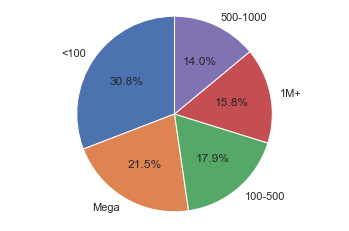

In [157]:
## Распределение по типам городов

labels = [x for x in df.city_type.unique()]
sizes = df.city_type.value_counts().reset_index()['city_type']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

Большая часть клиентов проживает в городах с населением меньше 100%. На втором месте - Мегаполисы.
При этом соотношение клиентов примерно одинаковое для всех типов городов. Это говорит о развитой сети отделений
или об отлаженных процессах по части дистанционного обслуживания.

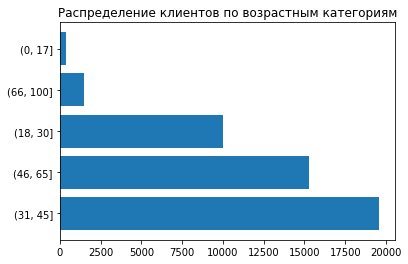

In [107]:
## По возрастным категориям: до 21, 21-40, 40-65, 65+
bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 30), (31, 45),(46,65),(66,100)])
labels = ['До 18 лет', 'От 66 до 100 лет', "От 18 до 30 лет", 'От 46 до 65 лет', 'От 31 до 45 лет']
df['age_groups'] = pd.cut(df.age, bins, labels=labels)
sizes = df['age_groups'].value_counts().reset_index(drop = True)
fig1, ax1 = plt.subplots()
ax1.barh(width = sizes, y = sizes.index, tick_label = df['age_groups'].value_counts().index)
plt.title('Распределение клиентов по возрастным категориям')
plt.show()


Основная возрастная группа - от 31 до 45 лет. Около 70% процентов всех клиентов представлены возрастами от 31 до 65 лет.
Остальные преимущественно в группе от 18 до 30 лет.

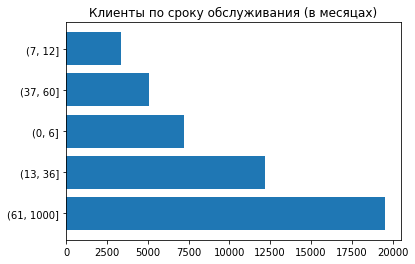

In [106]:
### Показатели по клиентам
## Распределение клиентов по сроку взаимодействия (в месяцах)
bins = pd.IntervalIndex.from_tuples([(0, 6), (7, 12), (13, 36),(37,60),(61,1000)])
df['mob_groups'] = pd.cut(df['full_mob'], bins)
df['mob_groups'].value_counts()
sizes = df['mob_groups'].value_counts().reset_index(drop = True)
fig1, ax1 = plt.subplots()
ax1.barh(width = sizes, y = sizes.index, tick_label = df['mob_groups'].value_counts().index)
plt.title('Клиенты по сроку обслуживания (в месяцах)')
plt.show()


Якорных клиентов (> 5 лет) у организации больше 38%!
Вторая самая большая группа - от 1 до 3 лет (примерно 22%).
Абсолютно новых клиентов (до 6 месяцев, 13%) и новых клиентов (до 1 года, 6%) 
в сумме получается около одной пятой всего портфеля.

Получается, что в интервале от 3 до 5 лет возникает аномалия: утечка клиентов,
поскольку соседние интервалы включают существенно больше клиентов.

С учётом, что ключевая доля клиентов из возрастной группы 31-45 и Мегаполисов, 
похоже либо на новый, но популярный бизнес-продукт, 
который запустили относительно недавно и пользовался популярностью на старте из-за промоакций 
либо тарифов по акции. Дальше акции отменили, предложение для клиента ухудшилось, поэтому клиенты 
на отсечке 3-5 лет вполне могли перейти к конкурентам. Либо без акций сузилась воронка продаж, 
и отток превысил приток клиентов.

Существенная доля новых клиентов (до 1 г.) может указывать на сработавшие маркетинговые мероприятия. 
За счёт акций или охватов воронка расширилась, новых клиентов больше.

Чтобы сделать вывод точнее, нужно посмотреть на соотношение дохода от клиента/срока обслуживания.
Если рост идёт только за счёт акций, то чистый доход от новых клиентов будет отрицателен, а от 
"якорных"/лояльных должен перекрывать этот минус. Если минус наблюдается и там, у компании проблемы со стратегией.

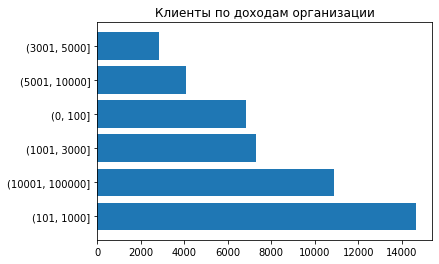

In [109]:
## Распределения дохода организации по клиентам

bins = pd.IntervalIndex.from_tuples([(0, 100),(101,1000), (1001, 3000), (3001, 5000),(5001,10000),(10001,100000)])
df['nbi_groups'] = pd.cut(df['nbi'], bins)
df['nbi_groups'].value_counts()
sizes = df['nbi_groups'].value_counts().reset_index(drop = True)
fig1, ax1 = plt.subplots()
ax1.barh(width = sizes, y = sizes.index, tick_label = df['nbi_groups'].value_counts().index)
plt.title('Клиенты по доходам организации')
plt.show()


В плане доходов организации от взаимодействия с клиентами ситуация очень контрастная.
Самая большая группа (прибл. 14 500 человек, 28% от общего числа) приносит от 100 до 1000 условных единиц.
При этом вторая самая большая группа (прибл. 22%) приносит максимальный доход - от 10 000 у.е.

Получается, что есть у клиентов есть как минимум 2 стратегии взаимодействия с организацией.
Важно изучить, какие группы клиентов и какие продукты генерируют больше прибыли.

In [147]:
### Для лучшей визуализации потребуется перевести числовые величины в ln, потому что есть выборсы
### напрямую значения интерпретировать не сможем, но порядок сохранится -- можем делать выводы по трендам
## Можно будет ещё изучить другую метрику - у.е. прибыли на 1 месяц взаимодействия

df['nbi_per_m'] = df['nbi']/df['full_mob']
df['ln_nbi_per_m'] = np.log(df['nbi_per_m'])
df['ln_nbi'] = np.log(df['nbi'])
df['ln_income'] = np.log(df['income'])
df['ln_avgtrx'] = np.log(df['Avg_trx'])


c:\Users\mikha\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


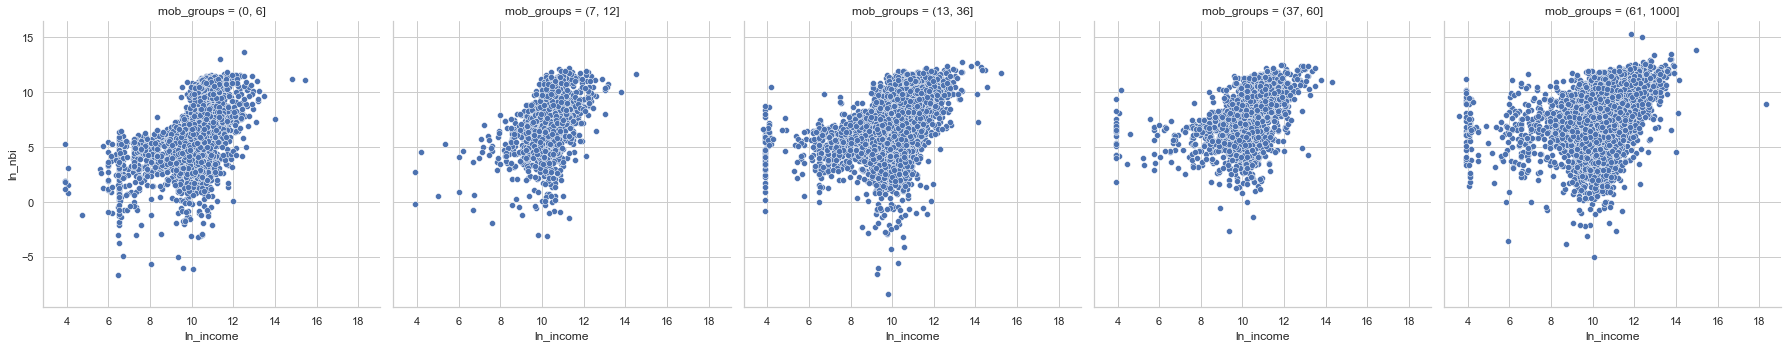

In [148]:
sns.relplot(x='ln_income', y='ln_nbi', col = 'mob_groups', data=df)

По соотношению "доход клиента" - "доход от клиента" есть общий тренд: чем больше доход клиента, тем больше зарабатывает организация.
При этом у групп клиентов со сроком взаимодействия больше 1 года есть кластеры относительно высокого nbi при низком доходе.
Похоже на ситуацию с кредитами, когда заёмщик закрывает "тело" кредита перед банком, а генерирует положительный денежный поток при том же риске для банка.
Формально всё наоборот: платежи идут сначала в проценты, а затем в "тело" долга. Потому что будущие платежи формируются от "тела".

Первое впечатление о сверхдоходности долгосрочных клиентов оказалось частично верным: группа от 3 до 5 лет всё же чаще генерирует NBI выше среднего. 

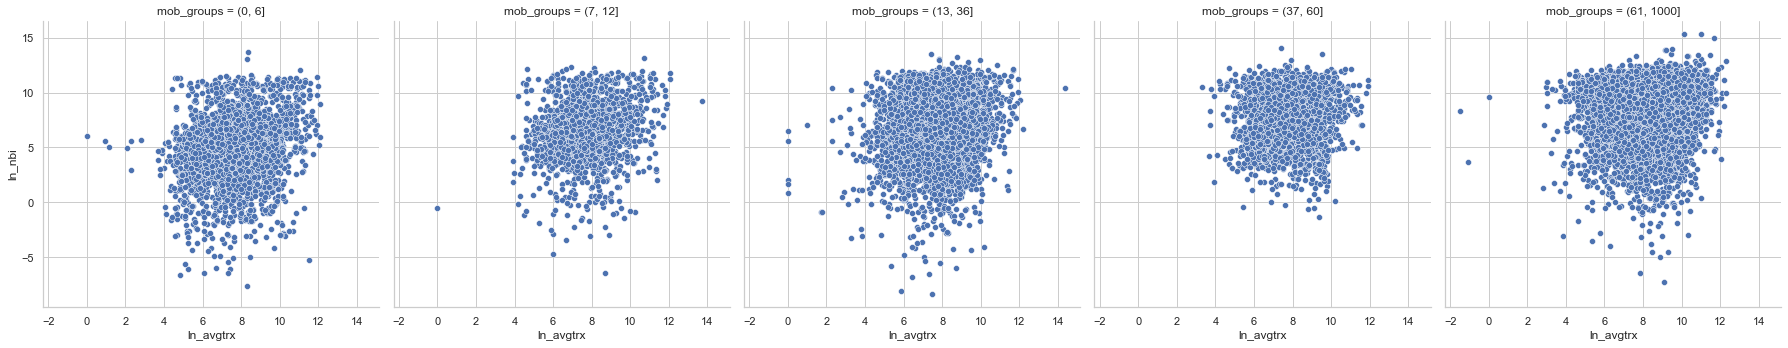

In [150]:
sns.relplot(x='ln_avgtrx', y='ln_nbi', col = 'mob_groups', data=df)

Контринтуитивное наблюдение: основную часть чистого дохода с клиентов (NBI) генерируют клиенты со сроком взаимодействия > 5 лет.
Но при этом средний размер транзакции практически одинаков для каждой из групп, за исключением выбросов!

Получается, доход от клиента не зависит от транзакционного бизнеса. Возможно, есть другие продукты (кредитные, депозитные, брокерские, инвестиционные, страховые),
которые генерируют эту ценность и для клиента, и для организации. Давайте посмотрим соотношение дохода от клиента и обороты по кредитам, депозитам, счетам, доход самого клиента.

Нужно проверить доходы от клиента в зависимости от балансов по разным продуктам.

In [151]:
### Сначала логарифмируем балансы клиентов.

df['ln_cl_balance_0m'] = np.log(df['cl_balance_0m'])
df['ln_ml_balance'] = np.log(df['ml_balance'])
df['ln_loan_balance_0m'] = np.log(df['loan_balance_0m'])
df['ln_td_balance_0m'] = np.log(df['td_balance_0m'])
df['ln_casa_balance_0m'] = np.log(df['casa_balance_0m'])


c:\Users\mikha\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


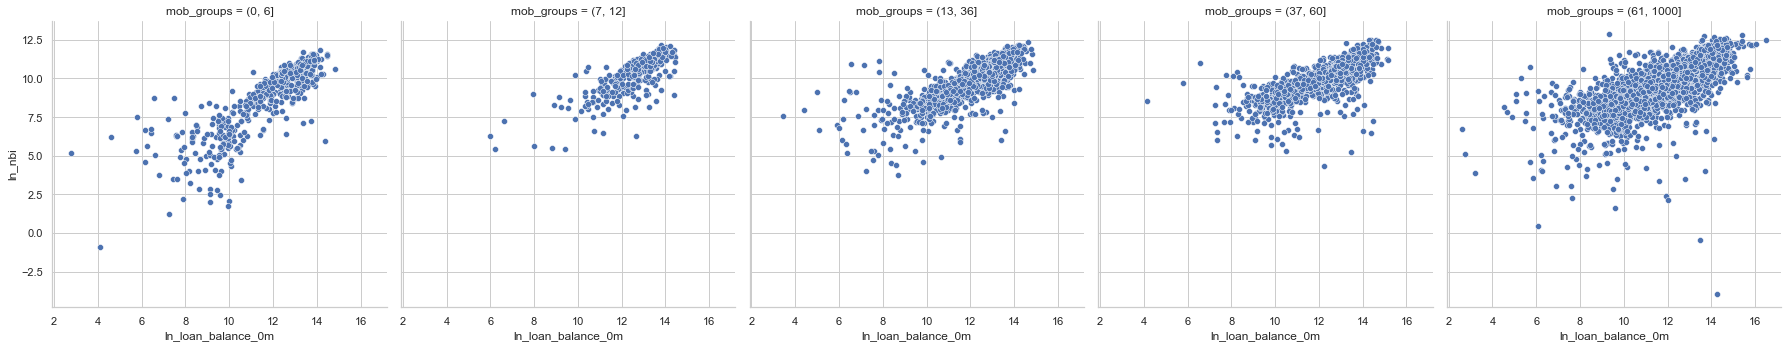

In [152]:
sns.relplot(x='ln_loan_balance_0m', y='ln_nbi', col = 'mob_groups', data=df)

Предсказуемо, чем больше кредитов у клиента - тем больше денег он приносит. Вне зависимости от срока взаимодействия.

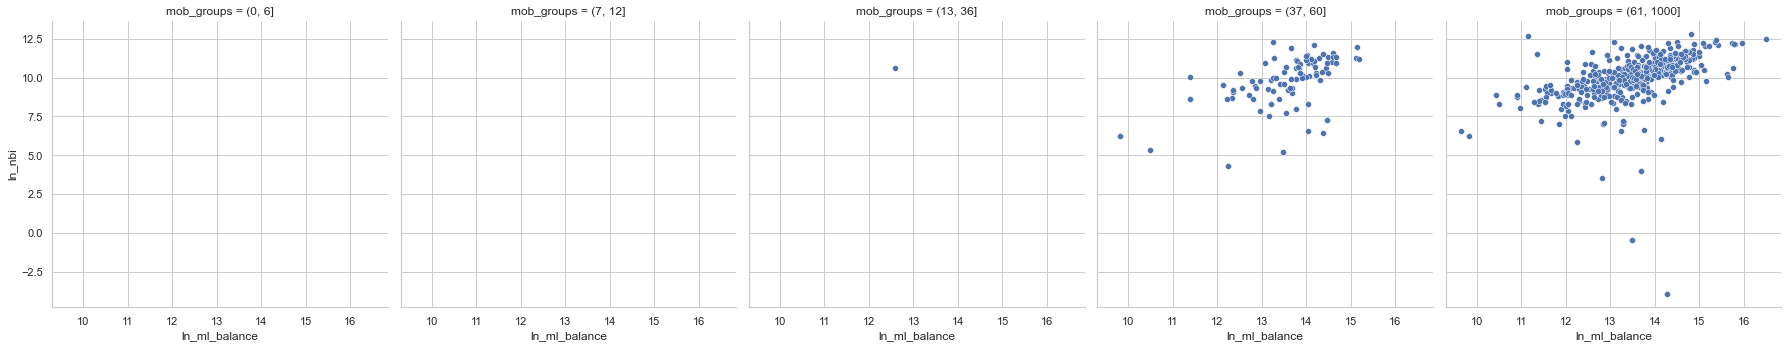

In [153]:
sns.relplot(x='ln_ml_balance', y='ln_nbi', col = 'mob_groups', data=df)

У относительно "новых" клиентов отсутствуют одновременные наблюдения с NBI и ипотекой. При этом NBI ранее были наблюдения. Получается, ипотеку выдают после 1 года - либо NBI по ним начинает начисляться только после этого срока. "Доходность" для банка выше среднего, эффект зависит от суммы ипотеки.

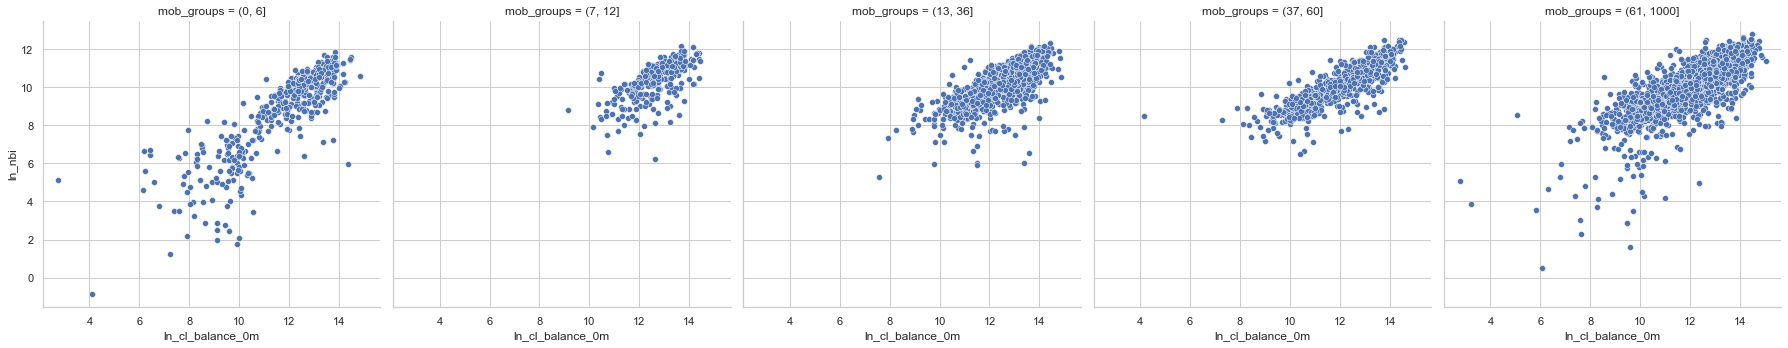

In [154]:
sns.relplot(x='ln_cl_balance_0m', y='ln_nbi', col = 'mob_groups', data=df)

Потребительские кредиты стабильно доходны только для клиентов от полугода взаимодействия. При этом потребительские кредиты для самых лояльных клиентов теряют доходность.
Видна большая доля недоходных потребительских кредитов в "корзине" до 6 месяцев. Вполне объясняется высокой долей дефолтов, т.к. потребительские кредиты обычно без залога.

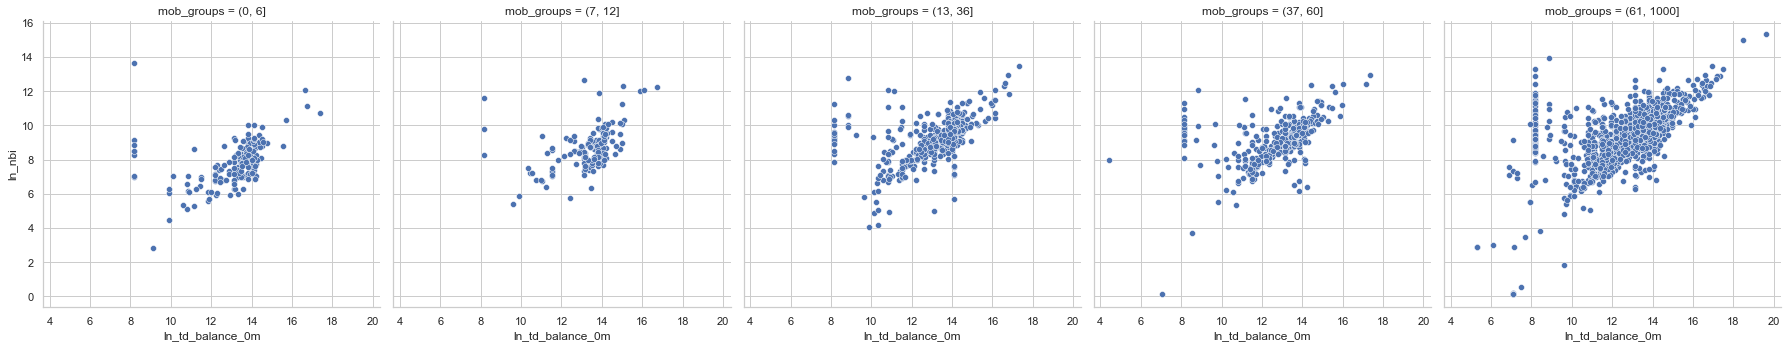

In [155]:
sns.relplot(x='ln_td_balance_0m', y='ln_nbi', col = 'mob_groups', data=df)

Депозиты в целом дают меньшую доходность банку, чем кредиты. Это логично - вклады являются фондированием для банка, по ним нужно платить %. Эффект особенно сильный для клиентов со сроком взаимодействия > 5 лет. Сложно сделать вывод, нужно рассмотреть чистую позицию банка по ликвидности и скорее смотреть на портфель банка, а не статистику по каждому из клиентов.

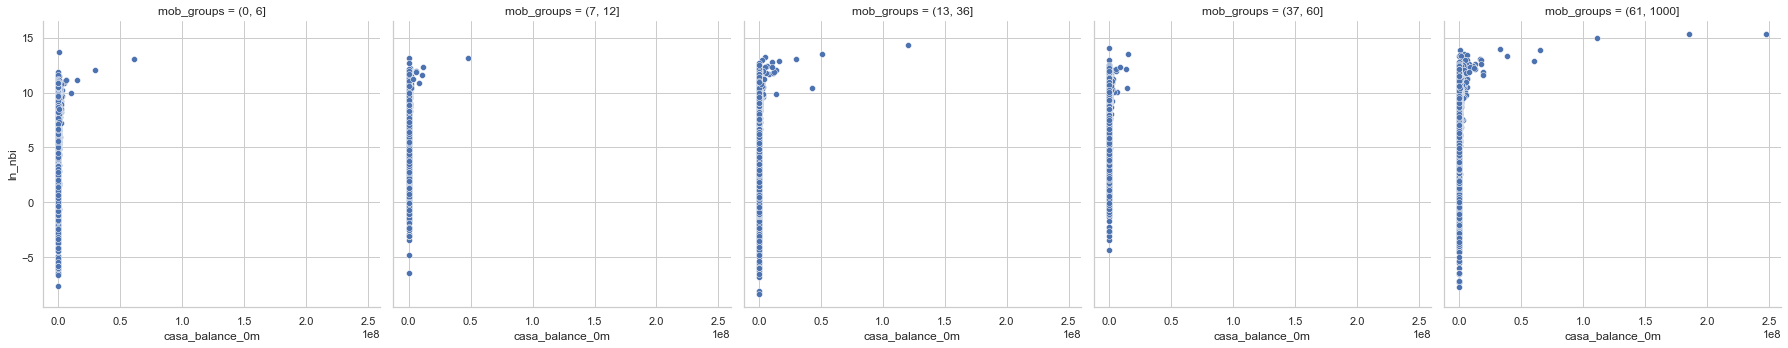

In [156]:
sns.relplot(x='casa_balance_0m', y='ln_nbi', col = 'mob_groups', data=df)

Сделать по счетам вывод сложно, т.к. много "шума" в виде выбросов. Если посмотреть на амплитуду NBI в самой многочисленной группе, то по всем корзинам наблюдается тренд из предыдущего анализа. В группе клиентов "больше 1 года, но меньше 3 лет" и "больше 5 лет" больше всего аномалий по размеру счёта. При этом связь между размером счёта и доходностью клиента скорее положительная.